# Лабораторная № 7
Прокопенко Тимофей, АСОБД, timophej3@gmail.com

### № 11.2.1

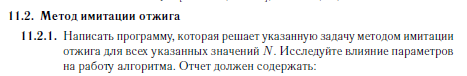

**Решение:**
## 1. Полная постановка задачи.
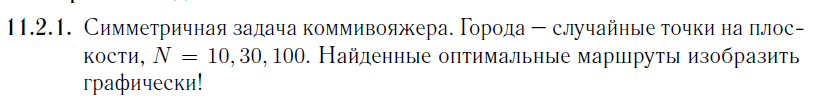

## 2. Исходный код программы:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import copy
from time import time
from collections import OrderedDict


def eucl_dist(a, b):
    return round(math.sqrt(math.pow((a[0]-b[0]), 2) + math.pow((a[1]-b[1]), 2)), 3)


def get_route_cost(route, distances):
    sum_without_last = sum([distances[city_num][route[i+1]] for i, city_num in enumerate(route) if i+1 < len(route)])
    return sum_without_last + distances[route[-1]][route[0]]


def get_next_route(route, swap=False):
    new_route = copy.deepcopy(route)
    swap_coords = [0, 0]
    while swap_coords[0] == swap_coords[1]:
        swap_coords = np.random.randint(0, len(route)-1, 2)
    i, j = swap_coords[0], swap_coords[1]
    if swap:
        new_route[i], new_route[j] = new_route[j], new_route[i]
    else:
        if i > j:
            i, j = j, i
        list_to_invert = route[i:j]
        list_to_invert.reverse()
        new_route[i:j] = list_to_invert
    return new_route


def metropolis(initial_route, distances, t, steps):
    x = copy.deepcopy(initial_route)
    changes_counter = 0
    for i in range(steps):
        y = get_next_route(x)
        delta = get_route_cost(y, distances) - get_route_cost(x, distances)
        if delta <= 0:
            x = y
            changes_counter += 1
        else:
            if np.random.rand() < math.exp(-delta/t):
                x = y
                changes_counter += 1

    return x, changes_counter


def plot_route(route, points, t=0, title=""):
    x_values = []
    y_values = []
    for city_num in route:
        x_values.append(points[city_num][0])
        y_values.append(points[city_num][1])

    x_values.append(points[route[0]][0])
    y_values.append(points[route[0]][1])

    plt.plot(x_values, y_values, '-o')
    plt.show()


def simulate_annealing(N, repeat = 3):
    all_iters = []
    all_costs = []
    running_times = []
    for rep in range(repeat):
      x_values = np.random.random(N)*N
      y_values = np.random.random(N)*N
      points = OrderedDict()
      for i, x_value in enumerate(x_values):
          points[i] = (round(x_value, 3), round(y_values[i], 3))

      distances = [[0 for x in range(N)] for y in range(N)]
      for i in range(N):
          for j in range(N):
              distances[i][j] = eucl_dist(points[i], points[j])

      route = list(points.keys())
      print(route)

      plot_route(route, points, title="Initial route.")
      metropolis_steps = 1000
      print(f"Initial route cost: {get_route_cost(route, distances)}.")

      t_start = 100
      t_end = 0.1
      t = t_start
      costs = []
      iters = []
      a = time()
      for k in range(100000):
          costs.append(get_route_cost(route, distances))
          iters.append(k)
          route, amount_of_changes = metropolis(route, distances, t, metropolis_steps)
          t = (0.1*t_start)/(k+1)
          if amount_of_changes == 0 or t < t_end:
              break
      b = time()

      plot_route(route, points, title="Final route.")
      print(f"Final route cost: {get_route_cost(route, distances)}.")
      print(f"Final route: {route}")
      print(f"Time of work:{b-a}")
      all_iters.append(iters)
      all_costs.append(costs)
      running_times.append(b-a)
    
    for rep in range(repeat):
      plt.plot(all_iters[rep], all_costs[rep])
    
    plt.show()
    print(f"Average time: {sum(running_times)/repeat}")


if __name__ == "__main__":
    N = [10, 30, 100]

    for n in N:
      simulate_annealing(n)

## 3. 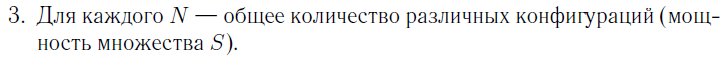

Согласно конспекту мощность множества S можно рассчитать по формуле ((N-1)!)/2. Напишем простой код для расчета.

In [2]:
import math

def calc_power(N):
    return math.factorial(N-1)/2

print(calc_power(10))
print(calc_power(30))
print(calc_power(100))

181440.0
4.420880996869851e+30
4.666310772197208e+155


## 4. 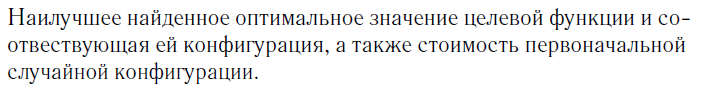

Как видно по коду программы, для каждого N было совершено 3 прогона. В пункте 4 приведем первое решение для каждого N.<br>
Для ускорения времени работы программы мы несколько пожертвовали корректностью ответа. Для более близкого к абсолютно правильному маршруту необходимо задавать большее начальное значение температуры.<br>
N=10:
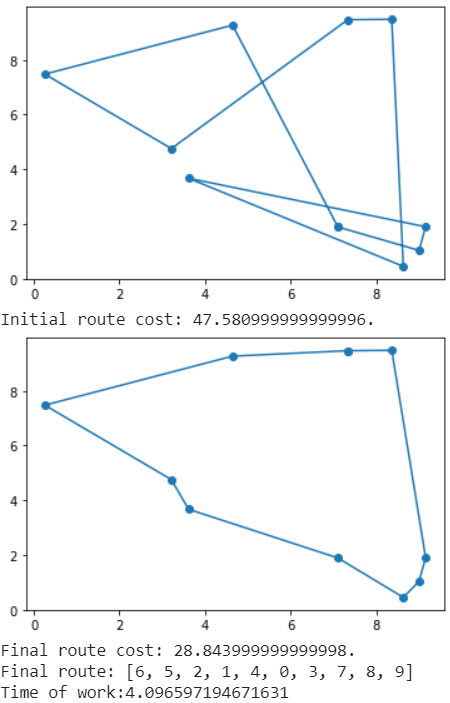

N=30:
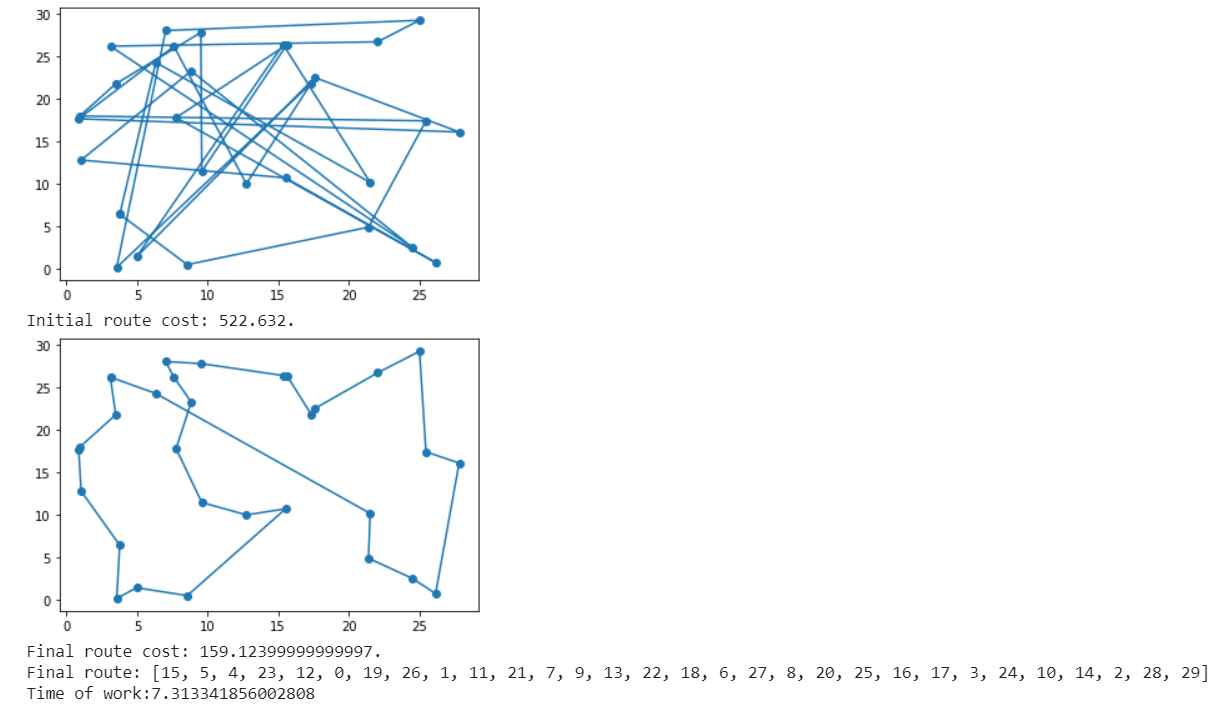

N=100:
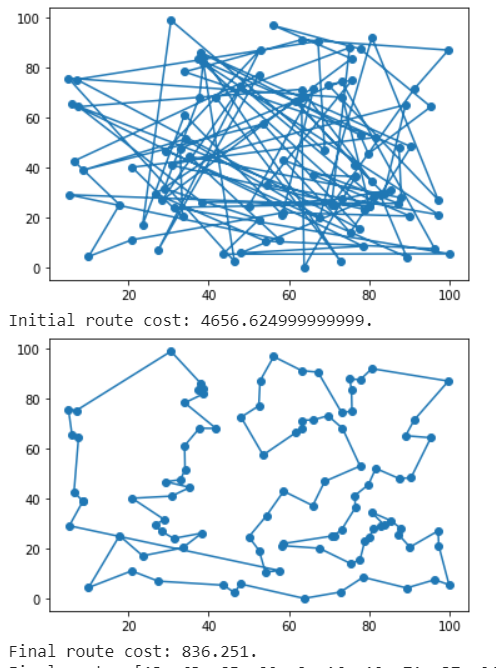
Final route: [13, 63, 85, 29, 2, 16, 19, 71, 37, 94, 4, 45, 39, 36, 21, 12, 49, 67, 97, 92, 47, 35, 53, 78, 31, 84, 48, 20, 62, 61, 60, 65, 33, 3, 27, 55, 38, 28, 68, 51, 32, 5, 9, 58, 83, 96, 26, 87, 90, 69, 80, 0, 93, 15, 81, 11, 22, 59, 41, 30, 25, 56, 89, 73, 46, 95, 70, 74, 91, 42, 43, 10, 75, 40, 77, 7, 50, 17, 44, 76, 66, 64, 79, 14, 88, 54, 86, 23, 8, 1, 72, 18, 57, 82, 6, 24, 34, 52, 98, 99]

## 5. 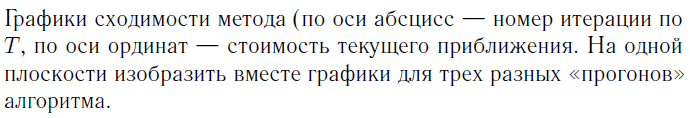

Самое интересное можно наблюдать на графиках сходимости для N=10 в силу небольшого значения параметра начальной температуры.
Видно, что даже при установившемся оптимальном решении иногда происходят переходы к решению с большей стоимостью. После мы снова возвращаемся к оптимальному решению. Это прекрасно отражает суть метода отжига.

N=10:
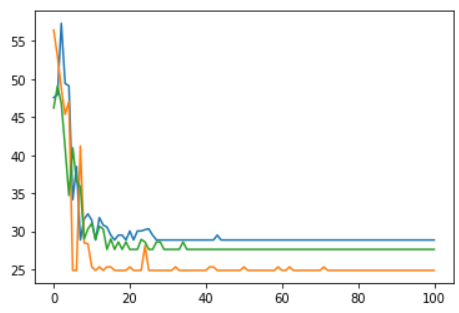

N=30:
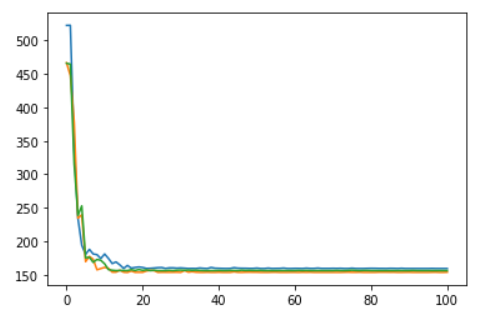

N=100:
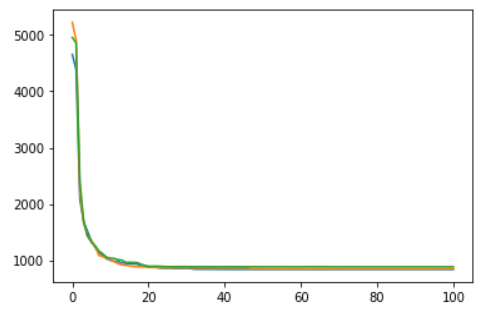

## 6. Среднее время работы алгоритма: 

Проводились по 3 испытания для каждого N (в секундах):<br>
a) N=10: 4.143814404805501<br>
б) N=30: 7.922892729441325<br>
в) N=100: 13.913748025894165<br>

## 7. Ответы на следующие вопросы: <br>
# а) 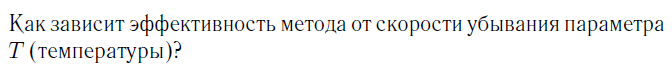

В коде программы (пункт 2) попробуем изменить коэффицент при пересчете температуры. Возьмем 1, 0.1, 0.01.
Проверять будем для N = 10:
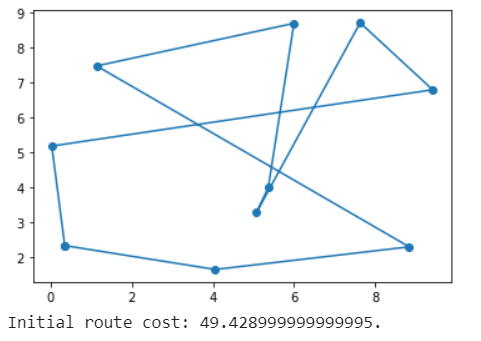

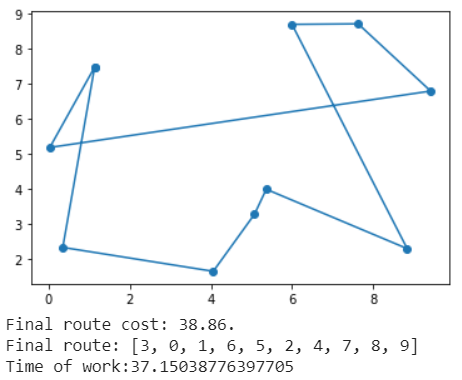

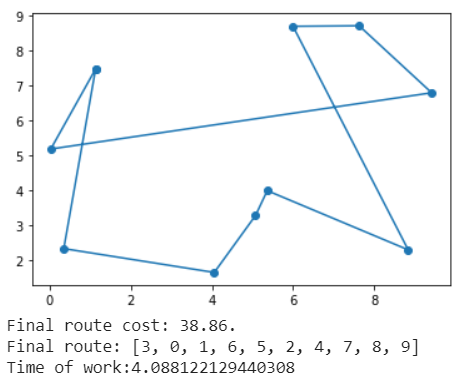

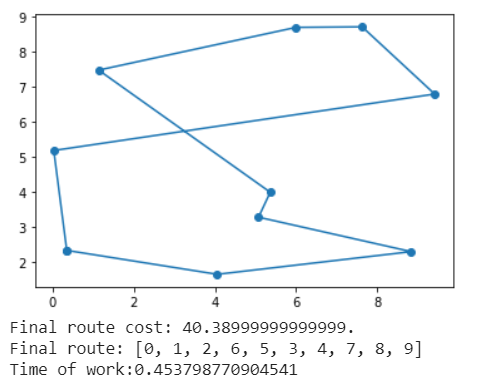

Как видно, при очень быстром понижении температуры оптимальный маршрут может не успеть установиться даже при маленьком N. В то же время для данного N не имеет значения работал алгоритм 40 секунд или 4, оптимальный путь находится практически сразу.
Проверим дополнительно при N=30:
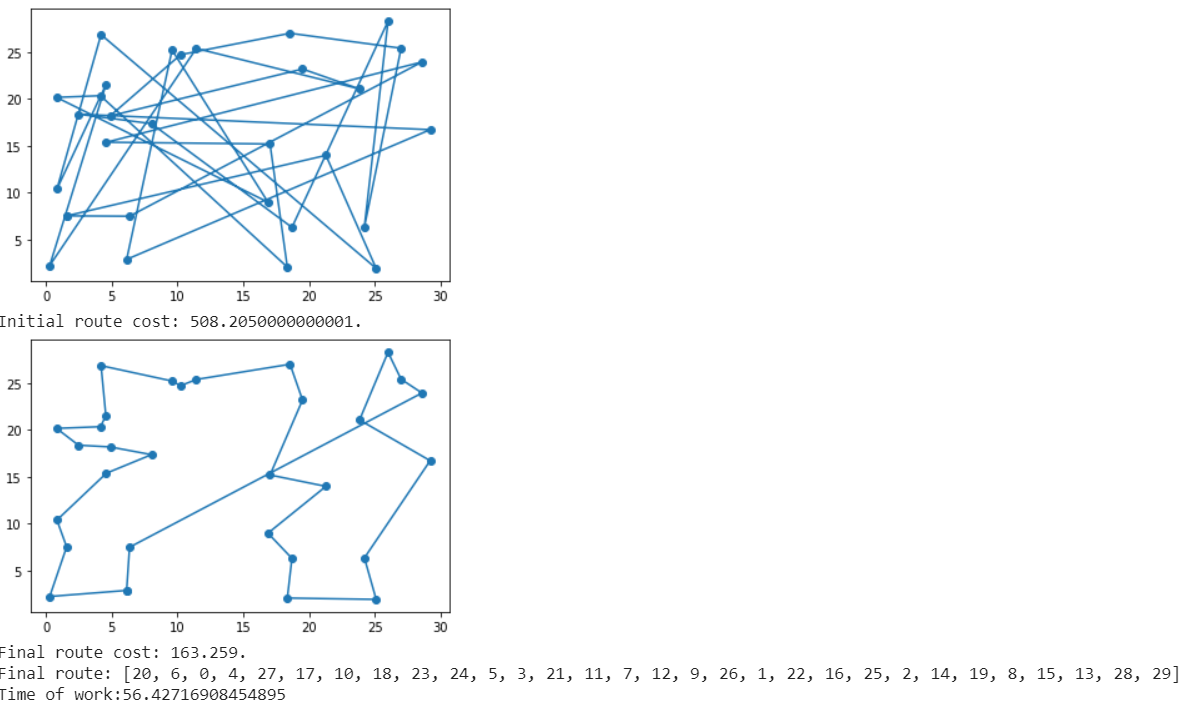

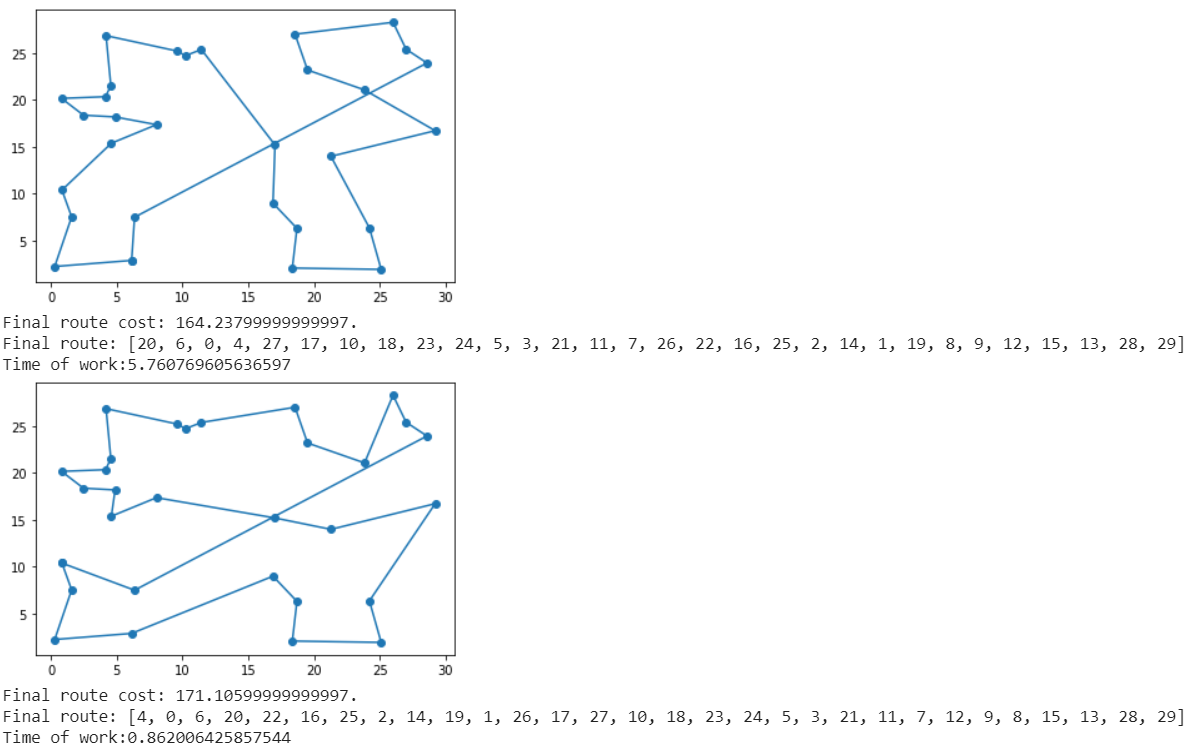

Видно, что чем дольше понижается температура и работает алгоритм, тем оптимальнее получается путь.

# b) 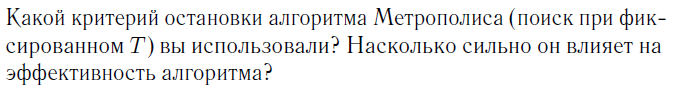

Я использовал остановку после определенного числа шагов. Проведем исследования, как влияет количество шагов. Возьмем значения 100, 1000, 10000. N=30, T_0 = 100.
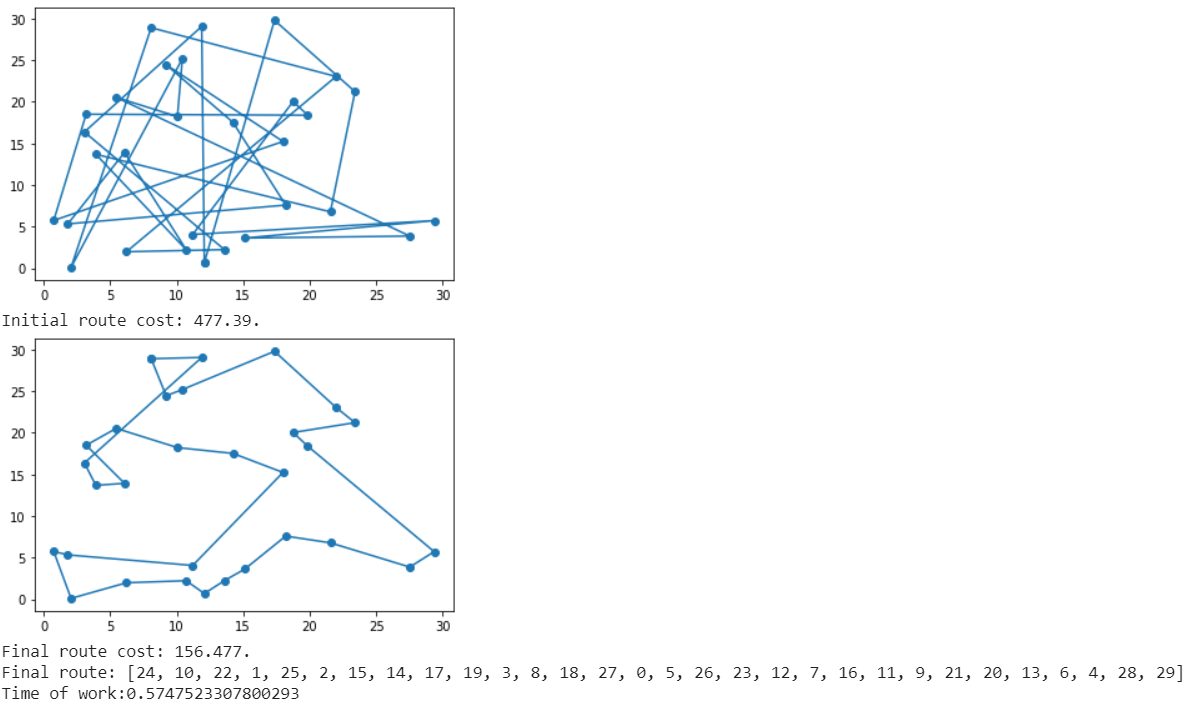

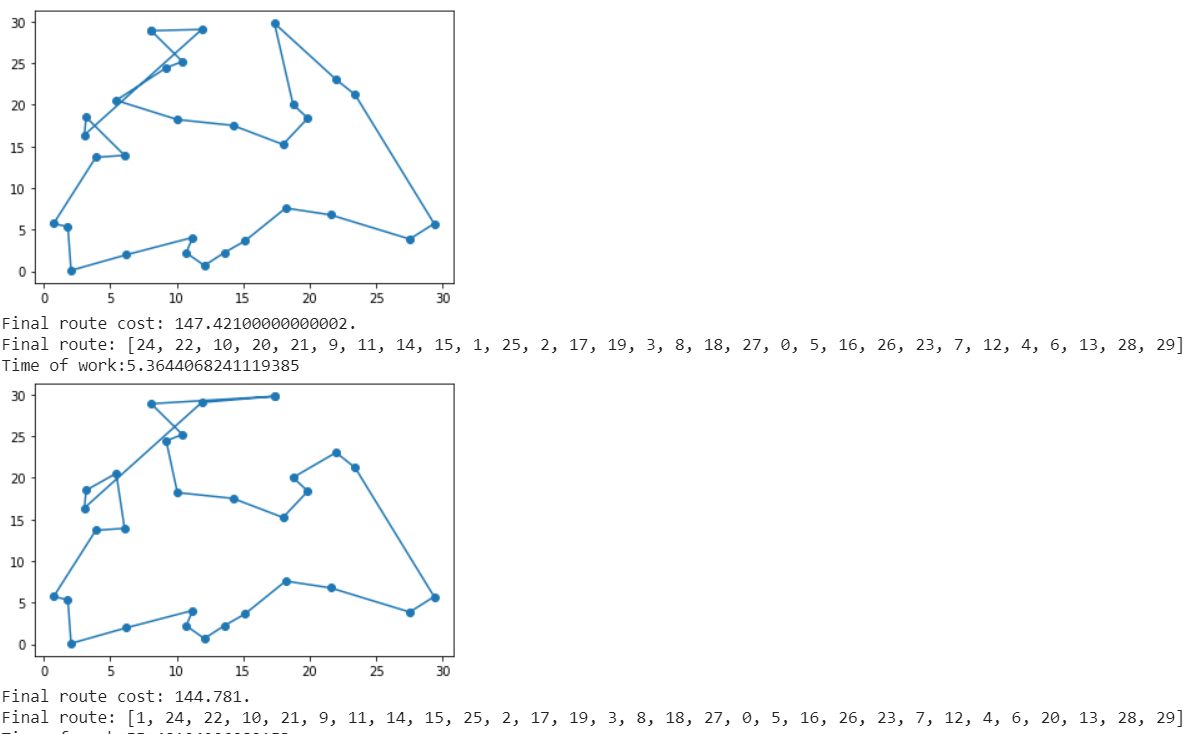

Как видно, увеличение количества прогонов алгоритма Метрополиса увеличивает время работы алгоритма и улучшает качество итогового пути. Но последующие испытания с более корректной начальной температурой показали, что увеличение количества шагов в алгоритме Метрополиса не дает существенного улучшения по качеству, а лишь увеличивает время работы алгоритмы.

# c) Какие значения параметров вам кажутся оптимальными?


При исследовании различных параметров я пришел к выводу, что начальная температура должна быть около 10000, падать не очень быстро, останавливаться на 0.1, к примеру.

Количество шагов в алгоритме Метрополиса - 100 при оптимально подобранной начальной температуре (10000).
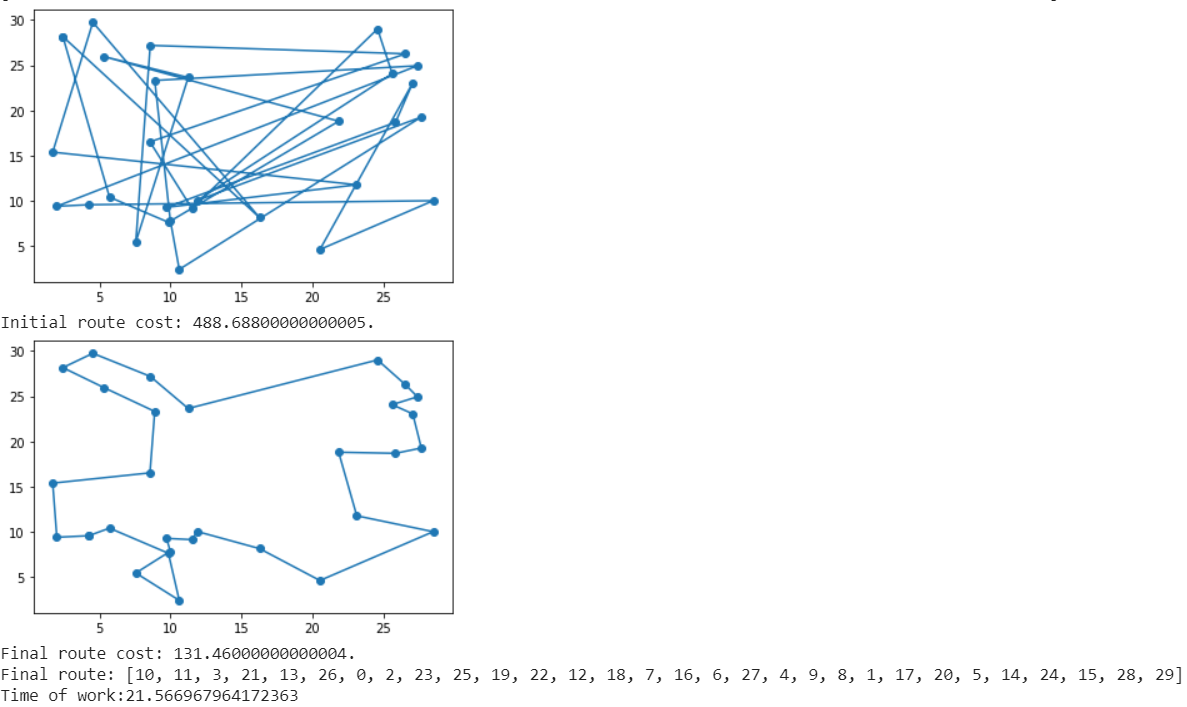

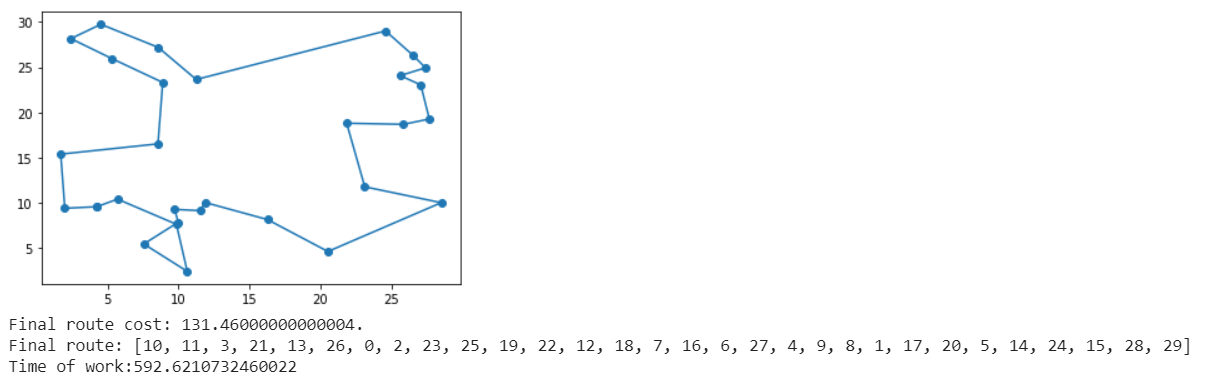

Из существенных улучшений - использование реверсии подмассива между двумя индексами, а не просто смена мест двух элементов.

# d) Насколько эффективен метод по сравнению со случайным поиском?


Очевидно, что данный алгоритм более эффективен по сравнению со случайным поиском, т.к. при медленно понижающейся температуре мы застрахованы от остановки алгоритма в точке локального минимума.